# Проект. Выбор локации для скважины

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

**Цель:**

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 

- Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. 
- Проанализируйте возможную прибыль и риски техникой Bootstrap.

**Шаги для выбора локации:**
- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

**Описание данных:**

Данные геологоразведки трёх регионов находятся в файлах: geo_data_0.csv, geo_data_1.csv, geo_data_2.csv

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Прочитаем данные из файла geo_data_0.csv методом read_csv и посмотрим, что они из себя представляют методами head() и info(). То же самое сделаем с файлами geo_data_1.csv и geo_data_2.csv

In [4]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [5]:
display(geo_data_0.head())
display(geo_data_0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [1107]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [1108]:
display(geo_data_1.head(5))
display(geo_data_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [1109]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [1110]:
display(geo_data_2.head(5))
display(geo_data_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Проверим датасеты на наличие дубликатов методом duplicated()

In [1111]:
print(geo_data_0.duplicated().sum(), geo_data_1.duplicated().sum(), geo_data_2.duplicated().sum())

0 0 0


**Вывод**

Видим, что пропусков нет, типы данных соответствуют, дубликатов нет.

В дальнейшем нам будет необходимо понимать, как распределены данные, поэтому отобразим числовые признаки на гистограмме и ящике с усами. Для этого напишем функцию, которая принимает на вход датасет, описание данных и количество  корзин.

In [1112]:
def graphics(data, data_label, num_bins, log_scale=False):
    sns.set_theme()
    f, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].set_title(data_label + "Плотность", fontsize=18)
    sns.distplot(data, bins=num_bins, ax=ax[0])
    ax[1].set_title(data_label + "Boxplot", fontsize=18)
    sns.boxplot(data=data, ax=ax[1])
    plt.show()

Выделим числовые признаки, для которых будем отображать гистограммы и ящики с усами, в отдельный список

In [1113]:
numerics = ['f0', 'f1', 'f2', 'product']

Функцией graphics выведем данные из первого датасета (для первого региона). То же сделаем и с двумя другими

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


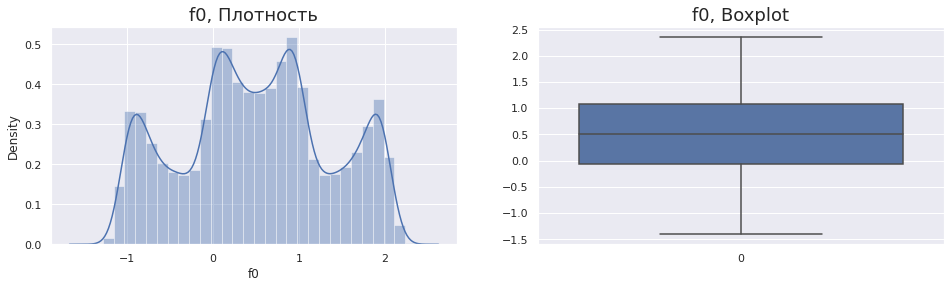

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


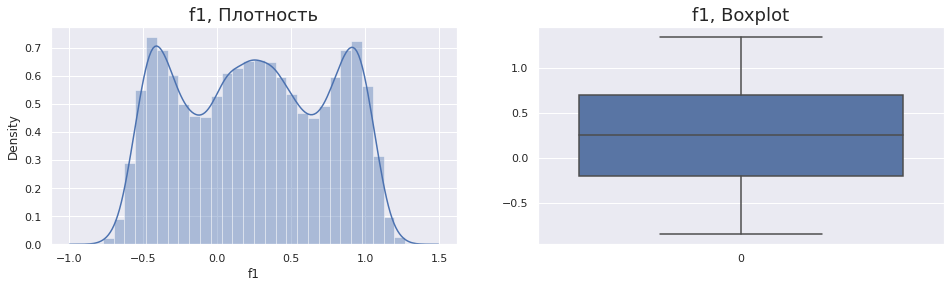

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


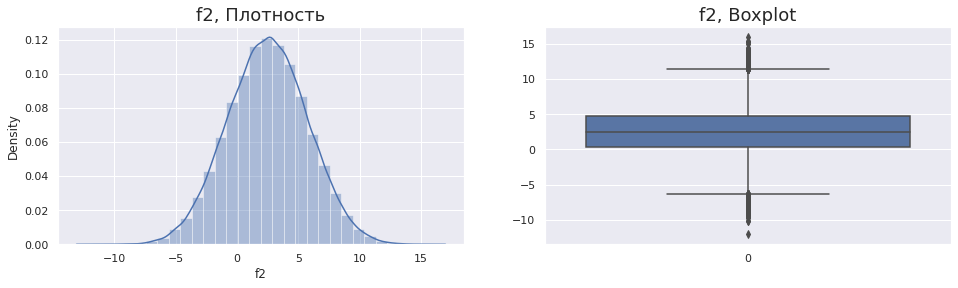

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


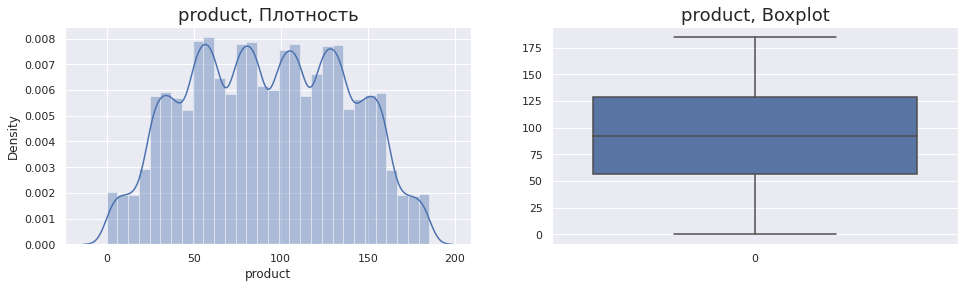

In [1114]:
for i in numerics:
    graphics(geo_data_0[i], i + ', ', 30)

Отобразим также данные и по второму региону.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


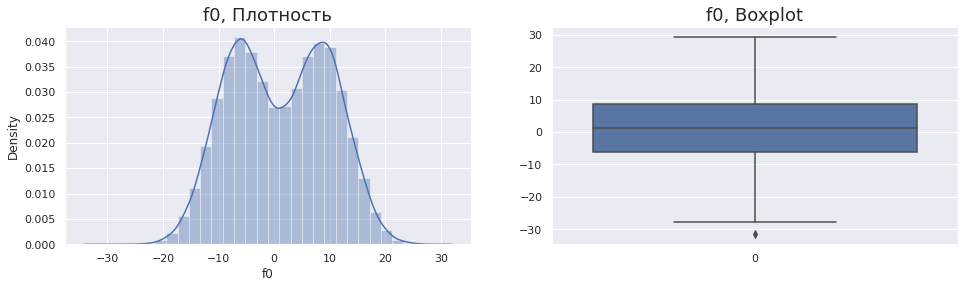

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


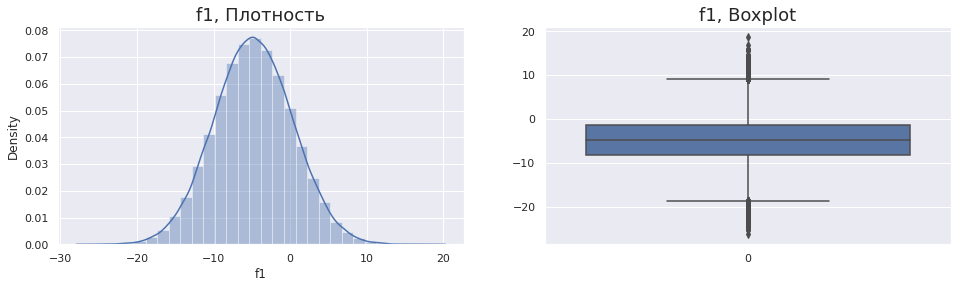

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


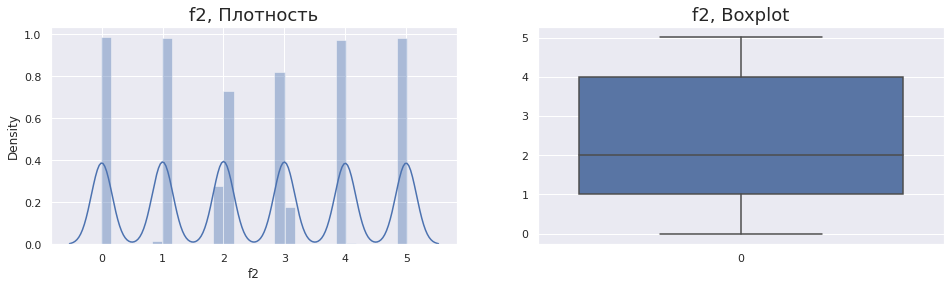

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


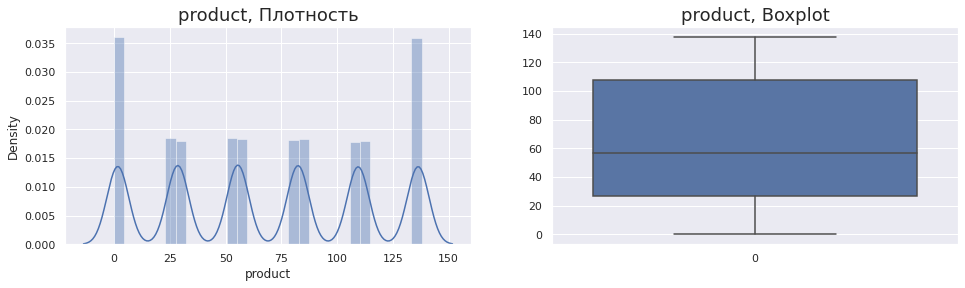

In [1115]:
for i in numerics:
    graphics(geo_data_1[i], i + ', ', 30)

И по третьему

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


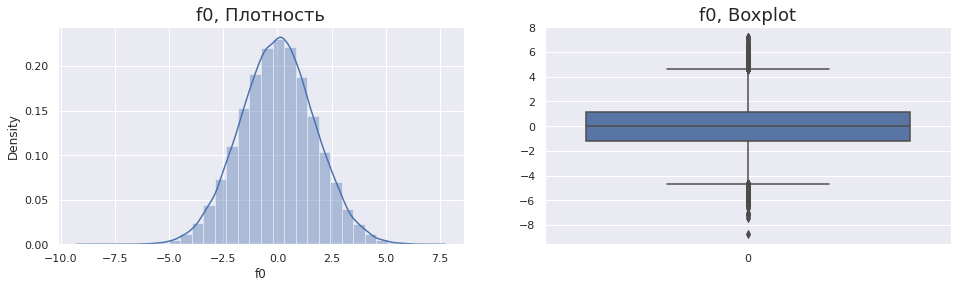

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


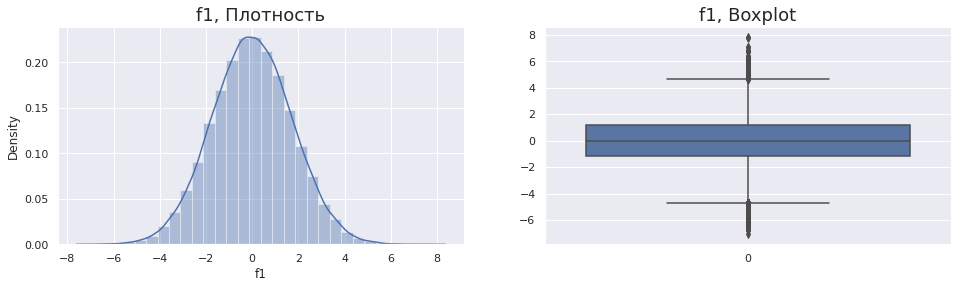

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


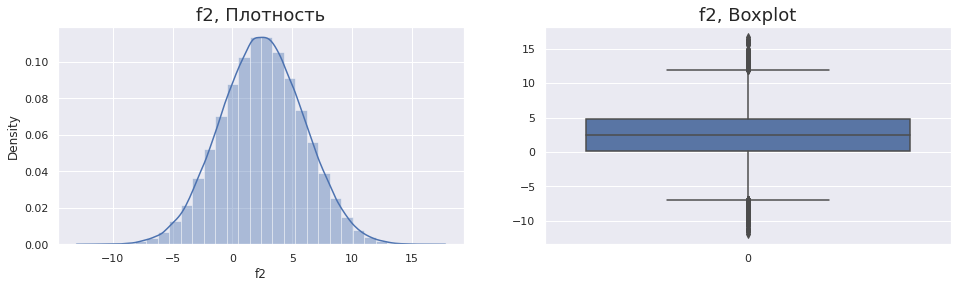

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


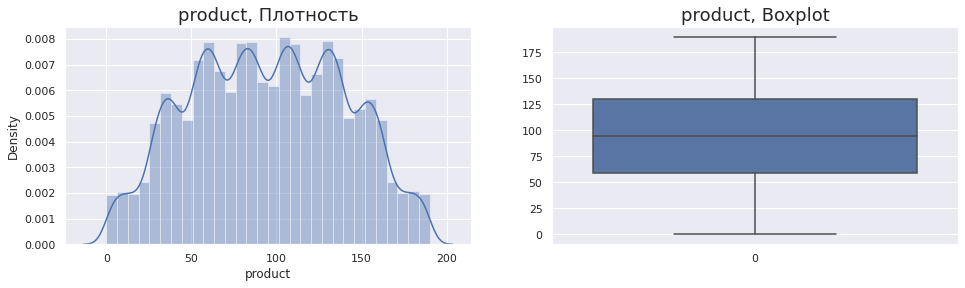

In [1116]:
for i in numerics:
    graphics(geo_data_2[i], i + ', ', 30)

**Вывод**

- Не все признаки распределены нормально. Также присутствуют небольшие выбросы. Так как неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов. Однако мы знаем, что все признаки значимые.
- Масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга. Нет необходимости применять масштабирование.
- На данном этапе оставим данные как есть.

Разделим данные на признаки и целевой признак.

Для этого выделим наименования признаков и целевого признака в отдельные списки, т.к. у нас несколько датасетов, и будет удобнее работать сразу со всеми.

In [1117]:
feature_names = ['f0', 'f1', 'f2']
target_name = ['product']
X_0 = geo_data_0[feature_names]
y_0 = geo_data_0[target_name]
X_1 = geo_data_1[feature_names]
y_1 = geo_data_1[target_name]
X_2 = geo_data_2[feature_names]
y_2 = geo_data_2[target_name]

**Выводы по главе:**

- Данные успешно загружены и проанализированы. Данные соответствуют описанию. Пропусков и дубликатов нет. Типы данных соответствуют.
- Не у всех признаков распределение нормальное. Также присутствуют небольшие выбросы. Данные оставлены без изменений.

## Обучение и проверка модели

Для каждого региона:

- Разделим данные на обучающую и валидационную выборки
- Используем модель линейной регрессии по техническому заданию.
- Выведем средний запас предсказанного сырья и RMSE модели.

Как уже было отмечено выше, в данном проекте проще работать через функции, т.к. у нас 3 датасета, поэтому напишем функцию, чтобы разделить исходные данные на обучающую и валидационную выборки (75/25), обучить модель линейной регрессии, сделать предсказания на валидационной выборке, посчитать и вывести на экран среднее значение предсказаний и RMSE модели.

In [1118]:
def model_fit(X, y):

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)
    predict_mean = predict.mean()
    rmse = mean_squared_error(y_valid, predict) ** 0.5

    print('Cредний запас предсказанного сырья:', predict_mean)
    print('RMSE:', rmse)
    
    return y_valid, predict

Сделаем разделение выборок и расчеты для первого региона

In [1119]:
y_0_valid, predict_0 = model_fit(X_0, y_0)

Cредний запас предсказанного сырья: 92.59256778438035
RMSE: 37.5794217150813


Сделаем разделение выборок и расчеты для второго региона

In [1120]:
y_1_valid, predict_1 = model_fit(X_1, y_1)

Cредний запас предсказанного сырья: 68.728546895446
RMSE: 0.893099286775617


Сделаем разделение выборок и расчеты для третьего региона

In [1121]:
y_2_valid, predict_2 = model_fit(X_2, y_2)

Cредний запас предсказанного сырья: 94.96504596800489
RMSE: 40.02970873393434


**Выводы:**

- В регионах 1 и 3 достаточно высокий средний показатель запаса предсказанного сырья (92.6 и 95 соответственно). Однако RMSE для данных регионов также высок (37.6 и 40 соответственно). Это свидетельствует о неоднозначности показателя, неточности модели регрессии.
- В регионе 2 средний показатель запаса предсказанного сырья составляет 68.7 (ниже остальных регионов). Однако RMSE в данном регионе также мал (0.9). Это говорит о точности предсказаний и качестве построенной модели.

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины и сравним полученный объём сырья со средним запасом в каждом регионе.

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [1122]:
budget = 10_000_000_000
best_wells = 200
sample_wells = 500
well_income = 450_000

In [1123]:
min_volume = budget / (best_wells * well_income)
print('Минимальный объём нефти с одной скважины для достижения безубыточности:', round(min_volume, 1))

Минимальный объём нефти с одной скважины для достижения безубыточности: 111.1


**Выводы:**

Минимальный объём нефти с одной скважины для достижения безубыточности 111.1. Данный показатель рассчитан при условии выбора 200 лучших скважин из 500 в выборке.
Данное значение превышает средние значения запасов скважин по всем регионам, однако на данном этапе нас это не пугает, т.к. мы смотрели средние значения по всем скважинам, а в итоге нам нужно будет выбрать 200 лучших. После того, как определим 200 лучших скважин, можно будет посмотреть на их среднее и уже сравнивать с порогом безубыточности. За идею спасибо Алексею Гриб и Алану Кабисову.

## Расчёт прибыли и рисков 

### Расчёт прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

- Выберем скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины. В нашем случае выберем случайно 500 точек и отберём 200 с максимальным показателем объёма сырья
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитаем прибыль для полученного объёма сырья.

Для того, чтобы метод .sample сработал, нам необходимо привести данные к типу Series. Спасибо Алану Кабисову за подсказку сбросить индексы

In [1124]:
y_0_valid = pd.Series(y_0_valid['product']).reset_index(drop=True)
y_1_valid = pd.Series(y_1_valid['product']).reset_index(drop=True)
y_2_valid = pd.Series(y_2_valid['product']).reset_index(drop=True)

In [1125]:
predict_0 = pd.Series(*predict_0.reshape(1,-1))
predict_1 = pd.Series(*predict_1.reshape(1,-1))
predict_2 = pd.Series(*predict_2.reshape(1,-1))

In [1126]:
state = 12345
def income_pred(target, predicts, state):
    
    sample_predictions = predicts.sample(n=sample_wells,
                                         replace=True,
                                         random_state=state)
    best_predictions = sample_predictions.sort_values(ascending=False)[:best_wells]
    best_targets = target[best_predictions.index]
    best_wells_volume_mean = best_targets.mean()
    volume = sum(best_targets)
    income = volume * well_income - budget
    return round(income, 2)

In [1127]:
print('Прибыль для полученного объёма сырья в Регионе 1:', income_pred(y_0_valid, predict_0, state))

Прибыль для полученного объёма сырья в Регионе 1: 605464074.57


In [1128]:
print('Прибыль для полученного объёма сырья в Регионе 2:', income_pred(y_1_valid, predict_1, state))

Прибыль для полученного объёма сырья в Регионе 2: 228016163.47


In [1129]:
print('Прибыль для полученного объёма сырья в Регионе 3:', income_pred(y_2_valid, predict_2, state))

Прибыль для полученного объёма сырья в Регионе 3: -71899228.24


### Расчёт рисков

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [1130]:
def risks(target, predicts, region):

    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(12345)
    for i in range(bootstrap_samples):
        income = income_pred(target, predicts, state)
        incomes.append(income)

    incomes = pd.Series(incomes)
    income_mean = incomes.mean()
    left_truth_border = incomes.quantile(alpha/2)
    right_truth_border = incomes.quantile(1-alpha/2)
    
    loss_count = 0
    for i in incomes :
        if i < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
    
    return (print(region),
            print('Средняя прибыль:', round(income_mean, 2)),
            print('Левая граница доверительного интервала', round(left_truth_border, 2)),
            print('Правая граница доверительного интервала', round(right_truth_border, 2)),
            print('Риск потерь:', round(loss_rate*100, 2), '%'))

In [1131]:
risks(y_0_valid, predict_0, 'Регион 1')

Регион 1
Средняя прибыль: 396164984.8
Левая граница доверительного интервала -111215545.89
Правая граница доверительного интервала 909766941.55
Риск потерь: 6.9 %


(None, None, None, None, None)

In [1132]:
risks(y_1_valid, predict_1, 'Регион 2')

Регион 2
Средняя прибыль: 456045105.79
Левая граница доверительного интервала 33820509.4
Правая граница доверительного интервала 852289453.86
Риск потерь: 1.5 %


(None, None, None, None, None)

In [1133]:
risks(y_2_valid, predict_2, 'Регион 3')

Регион 3
Средняя прибыль: 404403866.57
Левая граница доверительного интервала -163350413.39
Правая граница доверительного интервала 950359574.93
Риск потерь: 7.6 %


(None, None, None, None, None)

**Выводы:**

Судя по тому, что в границу 2.5% вероятности убытков по техническому условию проекта проходит только Регион 2, то можно сделать вывод, что только его мы можем рекомендовать для разработки.

## Инструкция по выполнению проекта

- Загрузите и подготовьте данные. Поясните порядок действий.

- Обучите и проверьте модель для каждого региона:

    * Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    * Обучите модель и сделайте предсказания на валидационной выборке.
    * Сохраните предсказания и правильные ответы на валидационной выборке.
    * Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    * Проанализируйте результаты.

- Подготовьтесь к расчёту прибыли:

    * Все ключевые значения для расчётов сохраните в отдельных переменных.
    * Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
    * Напишите выводы по этапу подготовки расчёта прибыли.

- Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

    * Выберите скважины с максимальными значениями предсказаний.
    * Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    * Рассчитайте прибыль для полученного объёма сырья.

- Посчитайте риски и прибыль для каждого региона:

    * Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    * Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    * Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован